#  NLP Programming assignment LSA  / SVD



---

1. Create corpora containing at least 7 documents from three domains (sport, politics, etc.)
2. Construct document-term-matrix. Apply necessary preprocessing (remove stopwords)
3. Perform LSI using SVD
*   find matrices U, S, V.
*   visualize concepts as wordcloud of terms
*   visualize document topics on radar plot


---

# 1. Corpora





You can any corpus of your choice. Possible sources:


*   newspaper articles (web-scraping libraries might be useful),
*   any extracted texts - available under public url (git, pastebin)
*   nltk corpus (brown)

##  newspaper articles






In [5]:
import sys

In [6]:
resource_path = './3-resources'

sys.path.append(resource_path)

In [14]:
!pip install newspaper3k
!pip install --upgrade lxml_html_clean

In [16]:
import newspaper

In [17]:
cnn_paper = newspaper.build('https://lite.cnn.com/')
articles = [article for article in cnn_paper.articles]


### custom texts

You can use pastebin tool to access content of your texts

In [18]:
import requests

political_articles = ['https://pastebin.pl/view/raw/ece8580e','https://pastebin.pl/view/raw/44a3b706']
motorization_articles = ['https://pastebin.pl/view/raw/2a98ba2f', 'https://pastebin.pl/view/raw/178ca72d', 'https://pastebin.pl/view/raw/74659fed']
sport_articles = ['https://pastebin.pl/view/raw/9f74daab', 'https://pastebin.pl/view/raw/f54f0750']




### nltk corpora

In [19]:
import nltk
nltk.download('brown')



[nltk_data] Downloading package brown to /home/draszec/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [20]:
from nltk.corpus import brown

brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [21]:

categories = ['romance', 'religion', 'government']

fileids = brown.fileids(categories)
print(fileids)
corpus = [ " ".join(brown.words(fileids=fileid)) for fileid in fileids]



['cd01', 'cd02', 'cd03', 'cd04', 'cd05', 'cd06', 'cd07', 'cd08', 'cd09', 'cd10', 'cd11', 'cd12', 'cd13', 'cd14', 'cd15', 'cd16', 'cd17', 'ch01', 'ch02', 'ch03', 'ch04', 'ch05', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16', 'ch17', 'ch18', 'ch19', 'ch20', 'ch21', 'ch22', 'ch23', 'ch24', 'ch25', 'ch26', 'ch27', 'ch28', 'ch29', 'ch30', 'cp01', 'cp02', 'cp03', 'cp04', 'cp05', 'cp06', 'cp07', 'cp08', 'cp09', 'cp10', 'cp11', 'cp12', 'cp13', 'cp14', 'cp15', 'cp16', 'cp17', 'cp18', 'cp19', 'cp20', 'cp21', 'cp22', 'cp23', 'cp24', 'cp25', 'cp26', 'cp27', 'cp28', 'cp29']


In [22]:
categories_files = [ brown.fileids(category) for category in categories]
print(categories_files)

[['cp01', 'cp02', 'cp03', 'cp04', 'cp05', 'cp06', 'cp07', 'cp08', 'cp09', 'cp10', 'cp11', 'cp12', 'cp13', 'cp14', 'cp15', 'cp16', 'cp17', 'cp18', 'cp19', 'cp20', 'cp21', 'cp22', 'cp23', 'cp24', 'cp25', 'cp26', 'cp27', 'cp28', 'cp29'], ['cd01', 'cd02', 'cd03', 'cd04', 'cd05', 'cd06', 'cd07', 'cd08', 'cd09', 'cd10', 'cd11', 'cd12', 'cd13', 'cd14', 'cd15', 'cd16', 'cd17'], ['ch01', 'ch02', 'ch03', 'ch04', 'ch05', 'ch06', 'ch07', 'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16', 'ch17', 'ch18', 'ch19', 'ch20', 'ch21', 'ch22', 'ch23', 'ch24', 'ch25', 'ch26', 'ch27', 'ch28', 'ch29', 'ch30']]


# Document term matrix

Prepare document term matrix (apply lemmatization)

In [23]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 3.4 MB/s eta 0:00:0000:0100:01m
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [36]:

import spacy
nlp = spacy.load("en_core_web_sm")

corpus_lemmatized = [" ".join([token.lemma_ for token in nlp(doc) if token.is_alpha]) for doc in corpus]
print(corpus_lemmatized[0])

as a result although we still make use of this distinction there be much confusion as to the meaning of the basic term employ just what be mean by spirit and by matter the term be generally take for grant as though they refer to direct and axiomatic element in the common experience of all yet in the contemporary context this be precisely what one must not do for in the modern world neither spirit nor matter refer to any generally agree upon element of experience we be in a transitional stage in which many of the connotation of former usage have have to be revise or reject when the word be use we be never sure which of the traditional meaning the user may have in mind or to what extent his revision and rejection of former understanding correspond to ours one of the most widespread feature of contemporary thought be the almost universal disbelief in the reality of spirit just a few century ago the world of spirit be as populous and real as the world of material entity not only in popular

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', norm="l2")
dtm = vectorizer.fit_transform(corpus_lemmatized)
terms = vectorizer.get_feature_names_out()

In [41]:
print(terms)


['aa' 'aback' 'abandon' ... 'zion' 'zip' 'zoooop']


Find indexes of sample tokens:

In [45]:
import numpy as np

In [187]:
sample_terms = ['tree', 'extraordinary', 'law', 'football']

terms_check = np.array(sample_terms)
ind = np.where(np.isin(terms, terms_check))[0]
print(ind)
print(terms[ind])

[3298 3585 5154 9331]
['extraordinary' 'football' 'law' 'tree']


Part of dtm matrix for selected terms:

In [188]:
select_dtm = dtm[:,ind]
print(select_dtm.toarray())

[[0.         0.02370723 0.         0.02035488]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.02106167 0.04765171]
 [0.         0.         0.01283247 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.0316116  0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.04509113 0.        ]
 [0.         0.05657019 0.02146791 0.        ]
 [0.         0.         0.01271331 0.        ]
 [0.01902035 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.01682027 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.00718843 0.        ]
 [0.         

#  SVD

## SVD - matrices

In [189]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import numpy as np

x = csr_matrix(dtm)
svd = TruncatedSVD(n_components=3)
svd_matrix = svd.fit_transform(x)

In [190]:
svd_matrix.shape

(76, 3)

In [191]:
print(svd_matrix)

[[ 0.27109307 -0.00954121  0.19920965]
 [ 0.27430712 -0.03877758  0.29191261]
 [ 0.22445173 -0.05844424  0.20624775]
 [ 0.24110971  0.03150178  0.45378546]
 [ 0.21569415  0.0214608   0.11223862]
 [ 0.39308607  0.0508528   0.52049219]
 [ 0.35681697  0.08167212  0.30197949]
 [ 0.14549214 -0.04611059  0.07351928]
 [ 0.26778371 -0.11240385  0.21723245]
 [ 0.32227858 -0.13714699  0.24896132]
 [ 0.24196473 -0.06530313  0.15138832]
 [ 0.22294957 -0.16631827  0.12063087]
 [ 0.20242812 -0.00532849 -0.01992424]
 [ 0.26943621 -0.07927673  0.28908306]
 [ 0.20184147 -0.02784829  0.19707288]
 [ 0.30299759  0.07215838  0.56451743]
 [ 0.37934197  0.00272608  0.09350997]
 [ 0.20636545 -0.31459329 -0.15529521]
 [ 0.28327037 -0.35450945 -0.07528438]
 [ 0.23291522 -0.05237202  0.03687943]
 [ 0.1814111  -0.25858617 -0.10401995]
 [ 0.17415215 -0.2231696  -0.10215943]
 [ 0.27919199 -0.42146015 -0.14137645]
 [ 0.19822192 -0.28135298 -0.15089875]
 [ 0.23432212 -0.17283518  0.04022981]
 [ 0.27189315 -0.42132999

In [192]:
svd.singular_values_

array([2.30020357, 1.69826571, 1.37854202])

In [ ]:
#  TODO

New coordinates, shape:  (76, 3)
[[ 2.70114927e-01  5.23647487e-03  2.12842345e-01]
 [ 2.71814688e-01  3.80981187e-02  2.88033554e-01]
 [ 2.26455631e-01  6.64157858e-02  2.38203609e-01]
 [ 2.37537544e-01 -2.70054238e-02  4.27977990e-01]
 [ 2.15115631e-01 -2.16695559e-02  1.14224079e-01]
 [ 3.89850277e-01 -3.76490124e-02  5.04336275e-01]
 [ 3.54158218e-01 -7.46725137e-02  2.92594877e-01]
 [ 1.47021228e-01  4.22894302e-02  8.24142452e-02]
 [ 2.64919440e-01  1.09548993e-01  2.42612810e-01]
 [ 3.22833386e-01  1.41147325e-01  2.50441529e-01]
 [ 2.43192347e-01  6.41015629e-02  1.22474950e-01]
 [ 2.21021300e-01  1.61579026e-01  1.23822023e-01]
 [ 2.04979113e-01  4.93085888e-03 -2.20948913e-02]
 [ 2.63563641e-01  7.54889176e-02  3.09418984e-01]
 [ 2.00370747e-01  2.49109137e-02  2.09772302e-01]
 [ 2.83579330e-01 -5.98370999e-02  5.34890502e-01]
 [ 3.81674044e-01  3.45337347e-03  1.21538720e-01]
 [ 2.04968087e-01  3.03380940e-01 -1.35098709e-01]
 [ 2.84443906e-01  3.45223969e-01 -5.49637944e-02

In [193]:
svd.components_[:,ind]

array([[ 0.00308706,  0.00423467,  0.01861739,  0.01581859],
       [ 0.002433  ,  0.00043584, -0.02188041,  0.01484223],
       [-0.00033291,  0.00143727,  0.00544656,  0.00699243]])

In [ ]:

# TODO

Term to topic coordinates for selected  sample terms:
['god', 'church', 'state', 'tax']
[[ 0.08932999  0.11702459  0.08428518  0.03663347]
 [ 0.00382311 -0.03180784  0.16457298  0.08324788]
 [ 0.15988686  0.34134614 -0.05390935 -0.07586897]]


## Topic visualization with wordclouds

For each topic generate pair of wordcloud charts: one with postive coordinates, one with negative (only)

In [209]:
from sklearn.preprocessing import MinMaxScaler

In [300]:
def generateWordCloud(positive, topic):
    all_vector = svd.components_[topic, :]
    if positive:
        i = all_vector > 0
    else:
        i = all_vector < 0
    if not any(i):
        return None
    scaler = MinMaxScaler()
    vector = all_vector[i]
    vector = scaler.fit_transform(vector.reshape(-1,1)).flatten()
    filtered_terms = terms[i]
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(dict(zip(filtered_terms, vector)))

    return wordcloud




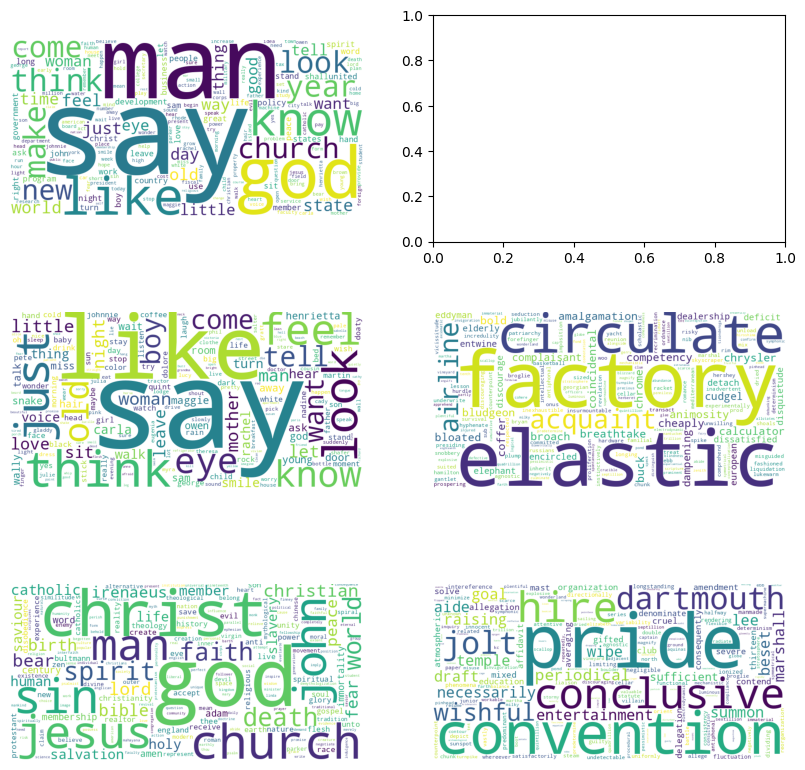

In [301]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud

fig = plt.figure(figsize=(10,10))
n_topics = 3

for i in range(n_topics):
    ax = fig.add_subplot(3,2,2*i+1)
    #posititive
    wordcloud = generateWordCloud(True, i)
    if wordcloud:
      ax.imshow(wordcloud)
      ax.axis('off')


    #negative
    ax = fig.add_subplot(3,2,2*i+2)
    wordcloud = generateWordCloud(False, i)

    if wordcloud:
      ax.imshow(wordcloud)
      ax.axis('off')


In [302]:
for i in range(n_topics):
    topic = svd_matrix[:, i]
    print(f"Topic {i + 1}: Min = {np.min(topic)}, Max = {np.max(topic)}")

Topic 1: Min = 0.09504445404825339, Max = 0.3999984886639153
Topic 2: Min = -0.42146014821049754, Max = 0.2614420016867425
Topic 3: Min = -0.16952620016362616, Max = 0.5645174281215011


In [ ]:
# TODO

Range of coordinates:  -0.26313449878283773 0.5348905021694564


## Document visualization with radar charts

For randomly selected 5 files from each category plot radarchart.


In [294]:
import plotly.graph_objects as go
def radarChart(U,  docNames, docSelection):
  categories = ['sport', 'food', 'politics']
  # categories = sample_terms
  fig = go.Figure()

  for doc in docSelection:
    fig.add_trace(go.Scatterpolar(
      r=U[doc],
      theta=categories,
      fill='toself',
      name=docNames[doc]
    ))


  fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=None
        )),
      showlegend=False
    )

  fig.show()

In [295]:
U = svd_matrix

In [296]:
docs_selection = range(5)
print([fileids[index] for index in docs_selection])
radarChart(U,fileids, docs_selection )

['cd01', 'cd02', 'cd03', 'cd04', 'cd05']


In [297]:
docs_selection =  range(20,25)
print([fileids[index] for index in docs_selection])
radarChart(U,fileids, docs_selection )

['ch04', 'ch05', 'ch06', 'ch07', 'ch08']


In [298]:
docs_selection =  range(20,25)
print([fileids[index] for index in docs_selection])
radarChart(U,fileids, docs_selection )

['ch04', 'ch05', 'ch06', 'ch07', 'ch08']


In [299]:
docs_selection =  range(50,55)
print([fileids[index] for index in docs_selection])
radarChart(U,fileids, docs_selection )

['cp04', 'cp05', 'cp06', 'cp07', 'cp08']
